Extracting ./mnist/train-images-idx3-ubyte.gz
Extracting ./mnist/train-labels-idx1-ubyte.gz
Extracting ./mnist/t10k-images-idx3-ubyte.gz
Extracting ./mnist/t10k-labels-idx1-ubyte.gz
train loss: 0.2323


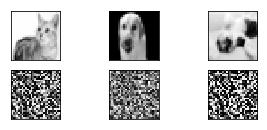

train loss: 0.0656


train loss: 0.0551


train loss: 0.0511


train loss: 0.0495


train loss: 0.0472


train loss: 0.0455


train loss: 0.0445


train loss: 0.0416


train loss: 0.0415


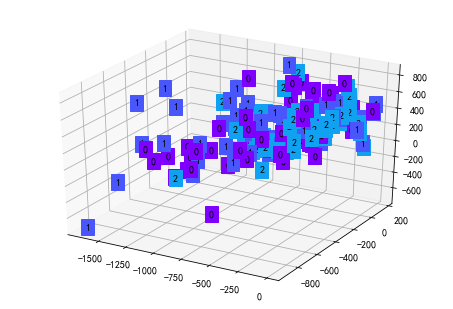

0 is cat
1 is dog
2 is bird


In [5]:
from PIL import Image 
import glob
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import numpy as np
tf.set_random_seed(1)

# Hyper Parameters
BATCH_SIZE = 64
LR = 0.002         # learning rate
N_TEST_IMG = 3
picsize=28
cdflie=glob.glob("./imageData/*.jpg")#呼叫所有jpg
test_x =[] 
test_y=[] 
tmpdata=[]
mnist = input_data.read_data_sets('./mnist', one_hot=False)
for sf in cdflie: 
    im = Image.open(sf).convert('L')#灰階設定

#print (im.format, im.size, im.mode)
    nim = im.resize( (picsize, picsize), Image.BILINEAR )#設定圖片為28*28 BILINEAR方式進行

    #手動分類
    if(sf[12::13]=='c'):
        test_y.append(0)
    elif(sf[12::13]=='d'):
        test_y.append(1)
    else :
        test_y.append(2)
    tmpdata=[]    
    for i in range(nim.size[0]):
        for j in range(nim.size[1]):
            tmpdata.append(nim.getpixel((j,i)))#會左轉
            #print(im.getpixel((i,j)))
    test_x.append(tmpdata)
# plot one example
#print(test_x.shape)     # (55000, 28 * 28)
#print(test_y.shape)     # (55000, 10)
#plt.imshow(test_x[0], cmap='gray')
#plt.title('%i' % np.argmax(test_y[0].labels[0]))
#plt.show()      
# tf placeholder
tf_x = tf.placeholder(tf.float32, [None, 28*28])    #暫存 value in the range of (0, 1)

# encoder解碼
en0 = tf.layers.dense(tf_x, 128, tf.nn.relu)
en1 = tf.layers.dense(en0, 64, tf.nn.relu)
en2 = tf.layers.dense(en1, 12, tf.nn.relu)
encoded = tf.layers.dense(en2, 3)

# decoder
de0 = tf.layers.dense(encoded, 12, tf.nn.relu)
de1 = tf.layers.dense(de0, 64, tf.nn.relu)
de2 = tf.layers.dense(de1, 128, tf.nn.relu)
decoded = tf.layers.dense(de2, 28*28, tf.nn.sigmoid)

loss = tf.losses.mean_squared_error(labels=tf_x, predictions=decoded)
train = tf.train.AdamOptimizer(LR).minimize(loss)

sess = tf.Session()
sess.run(tf.global_variables_initializer())

# initialize figure
f, a = plt.subplots(2, N_TEST_IMG, figsize=(5, 2))
plt.ion()   # continuously plot

# original data (first row) for viewing
view_data = test_x
for i in range(N_TEST_IMG):
    a[0][i].imshow(np.reshape(view_data[i], (28, 28)), cmap='gray')
    a[0][i].set_xticks(()); a[0][i].set_yticks(())

for step in range(1000):
    b_x, b_y = mnist.train.next_batch(BATCH_SIZE)
    _, encoded_, decoded_, loss_ = sess.run([train, encoded, decoded, loss], {tf_x: b_x})

    if step % 100 == 0:     # plotting
        print('train loss: %.4f' % loss_)
        # plotting decoded image (second row)
        decoded_data = sess.run(decoded, {tf_x: view_data})
        for i in range(N_TEST_IMG):
            a[1][i].clear()
            a[1][i].imshow(np.reshape(decoded_data[i], (28, 28)), cmap='gray')
            a[1][i].set_xticks(()); a[1][i].set_yticks(())
        plt.draw(); plt.pause(0.01)
plt.ioff()

# visualize in 3D plot
view_data = test_x
encoded_data = sess.run(encoded, {tf_x: view_data})
fig = plt.figure(2); ax = Axes3D(fig)
X, Y, Z = encoded_data[:, 0], encoded_data[:, 1], encoded_data[:, 2]
for x, y, z, s in zip(X, Y, Z, test_y):
    c = cm.rainbow(int(255*s/9)); ax.text(x, y, z, s, backgroundcolor=c)
ax.set_xlim(X.min(), X.max()); ax.set_ylim(Y.min(), Y.max()); ax.set_zlim(Z.min(), Z.max())
plt.show()
print('0 is cat')
print('1 is dog')
print('2 is bird')

from PIL import Image
import glob
cdflie=glob.glob("./imageData/*.jpg")
x_data=[]
y_data=[]
for sf in cdflie:
    im = Image.open(sf).convert('L')
    #print (im.format, im.size, im.mode)
    nim = im.resize( (100, 100), Image.BILINEAR )
    
    #print (nim.format, nim.size, im.mode)
    print(sf[12::13])
    if(sf[12::13]=='c'):
        y_data.append(0)
    else:
        y_data.append(1)
#print(im.size)
#print (im.format, im.size, im.mode)
print(y_data)
print(len(y_data))

#x_data=[]

#nim = im.resize( (100, 100), Image.BILINEAR )

#nim.show()


In [1]:
from PIL import Image 
import glob
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import numpy as np
tf.set_random_seed(1)

# Hyper Parameters
BATCH_SIZE = 64
LR = 0.002         # learning rate
N_TEST_IMG = 2
picsize=28
cdflie=glob.glob("./imageData/*.jpg")
test_x =[] 
test_y=[] 
tmpdata=[]

for sf in cdflie: 
    im = Image.open(sf).convert('L')

#print (im.format, im.size, im.mode)
    nim = im.resize( (picsize, picsize), Image.BILINEAR )


    if(sf[12::13]=='c'):
        test_y.append(0)
    else:
        test_y.append(1)
    tmpdata=[]    
    for i in range(nim.size[0]):
        for j in range(nim.size[1]):
            tmpdata.append(nim.getpixel((i,j)))
            #print(im.getpixel((i,j)))
    test_x.append(tmpdata)
# plot one example
#print(test_x.shape)     # (55000, 28 * 28)
#print(test_y.shape)     # (55000, 10)
#plt.imshow(test_x[0], cmap='gray')
#plt.title('%i' % np.argmax(test_y[0].labels[0]))
#plt.show()      
# tf placeholder
tf_x = tf.placeholder(tf.float32, [None, 28*28])    # value in the range of (0, 1)

# encoder
en0 = tf.layers.dense(tf_x, 128, tf.nn.relu)
en1 = tf.layers.dense(en0, 64, tf.nn.relu)
en2 = tf.layers.dense(en1, 12, tf.nn.relu)
encoded = tf.layers.dense(en2, 3)

# decoder
de0 = tf.layers.dense(encoded, 12, tf.nn.relu)
de1 = tf.layers.dense(de0, 64, tf.nn.relu)
de2 = tf.layers.dense(de1, 128, tf.nn.relu)
decoded = tf.layers.dense(de2, 28*28, tf.nn.sigmoid)

loss = tf.losses.mean_squared_error(labels=tf_x, predictions=decoded)
train = tf.train.AdamOptimizer(LR).minimize(loss)

sess = tf.Session()
sess.run(tf.global_variables_initializer())

# initialize figure
f, a = plt.subplots(2, N_TEST_IMG, figsize=(5, 2))
plt.ion()   # continuously plot

# original data (first row) for viewing
view_data = test_x
for i in range(N_TEST_IMG):
    a[0][i].imshow(np.reshape(view_data[i], (28, 28)), cmap='gray')
    a[0][i].set_xticks(()); a[0][i].set_yticks(())

for step in range(800):
    b_x, b_y = mnist.train.next_batch(BATCH_SIZE)
    _, encoded_, decoded_, loss_ = sess.run([train, encoded, decoded, loss], {tf_x: b_x})

    if step % 100 == 0:     # plotting
        print('train loss: %.4f' % loss_)
        # plotting decoded image (second row)
        decoded_data = sess.run(decoded, {tf_x: view_data})
        for i in range(N_TEST_IMG):
            a[1][i].clear()
            a[1][i].imshow(np.reshape(decoded_data[i], (28, 28)), cmap='gray')
            a[1][i].set_xticks(()); a[1][i].set_yticks(())
        plt.draw();
        plt.pause(0.01)
plt.ioff()

# visualize in 3D plot
view_data = test_x
encoded_data = sess.run(encoded, {tf_x: view_data})
fig = plt.figure(2); ax = Axes3D(fig)
X, Y, Z = encoded_data[:, 0], encoded_data[:, 1], encoded_data[:, 2]
for x, y, z, s in zip(X, Y, Z, test_y):
    c = cm.rainbow(int(255*s/9)); ax.text(x, y, z, s, backgroundcolor=c)
ax.set_xlim(X.min(), X.max()); ax.set_ylim(Y.min(), Y.max()); ax.set_zlim(Z.min(), Z.max())
plt.show()
print(len(view_data[0]))

NameError: name 'mnist' is not defined